Plotting of the results of training many low-rank networks for Fig 1, second and third columns (f-g-h and j-k-l) and Extended Data Fig. 1b-c-d. The data for this notebook was generated by the five scripts named '''training_scripts/\<data\>_lr_fig1.py'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import seaborn as sns
from low_rank_rnns.modules import *
from low_rank_rnns import helpers, raposo, mante, regressions, clustering
import low_rank_rnns.mixedselectivity as ms

In [2]:
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 19
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

palette = sns.color_palette()
palette = [palette[2], palette[1], palette[0], palette[3], palette[4]]

In [3]:
rdm_results = dict()
with np.load('../data/rdm_results.npz') as d:
    rdm_results['p'] = d['arr_0']
    rdm_results['c'] = d['arr_1']
    rdm_results['preg'] = d['arr_2']
    rdm_results['creg'] = d['arr_3']
    rdm_results['acc'] = d['arr_4']
    rdm_results['loss'] = d['arr_5']
    rdm_results['acc_res'] = d['arr_6']
    rdm_results['loss_res'] = d['arr_7']
    
romo_results = dict()
with np.load('../data/romo_results.npz') as d:
    romo_results['p'] = d['arr_0']
    romo_results['c'] = d['arr_1']
    romo_results['preg'] = d['arr_2']
    romo_results['creg'] = d['arr_3']
    romo_results['acc'] = d['arr_4']
    romo_results['loss'] = d['arr_5']
    romo_results['acc_res'] = d['arr_6']
    romo_results['loss_res'] = d['arr_7']
    
raposo_results = dict()
with np.load('../data/raposo_results.npz') as d:
    raposo_results['p'] = d['arr_0']
    raposo_results['c'] = d['arr_1']
    raposo_results['preg'] = d['arr_2']
    raposo_results['creg'] = d['arr_3']
    raposo_results['r2'] = d['arr_4']
    raposo_results['acc'] = d['arr_5']
    raposo_results['loss'] = d['arr_6']
    raposo_results['acc_res'] = d['arr_7']
    raposo_results['loss_res'] = d['arr_8']
    
mante_results = dict()
with np.load('../data/mante_results.npz') as d:
    mante_results['p'] = d['arr_0']
    mante_results['c'] = d['arr_1']
    mante_results['preg'] = d['arr_2']
    mante_results['creg'] = d['arr_3']
    mante_results['r2'] = d['arr_4']
    mante_results['acc'] = d['arr_5']
    mante_results['loss'] = d['arr_6']
    mante_results['acc_res'] = d['arr_7']
    mante_results['loss_res'] = d['arr_8']
    
dms_results = dict()
with np.load('../data/dms_results.npz') as d:
    dms_results['p'] = d['arr_0']
    dms_results['c'] = d['arr_1']
    dms_results['preg'] = d['arr_2']
    dms_results['creg'] = d['arr_3']
    dms_results['acc'] = d['arr_4']
    dms_results['loss'] = d['arr_5']
    dms_results['acc_res'] = d['arr_6']
    dms_results['loss_res'] = d['arr_7']
    
results_list = [rdm_results, romo_results, raposo_results, mante_results, dms_results]
labels = ['DM', 'WM', 'MDM', 'CDM', 'DMS']

In [4]:
# Loading Monte-Carlo distributions

rdm_dist = np.load('../data/rdm_lr_c_boot_distr.npy')
romo_dist = np.load('../data/romo_lr_c_boot_distr.npy')
raposo_dist = np.load('../data/raposo_lr_c_boot_distr.npy')
mante_dist = np.load('../data/mante_lr_c_boot_distr.npy')
dms_dist = np.load('../data/dms_lr_c_boot_distr.npy')

In [5]:
# Number of networks with significant p-value in loading space
for i, label in enumerate(labels):
    print(f'{label}: {len([p for p in results_list[i]["p"] if p < 0.05 / 100])}')

DM: 5
WM: 5
MDM: 9
CDM: 100
DMS: 100


In [6]:
# Number of networks with significant p-value in regressor space
for i, label in enumerate(labels):
    print(f'{label}: {len([p for p in results_list[i]["preg"] if p < 0.05 / 100])}')

DM: 0
WM: 0
MDM: 1
CDM: 100
DMS: 48


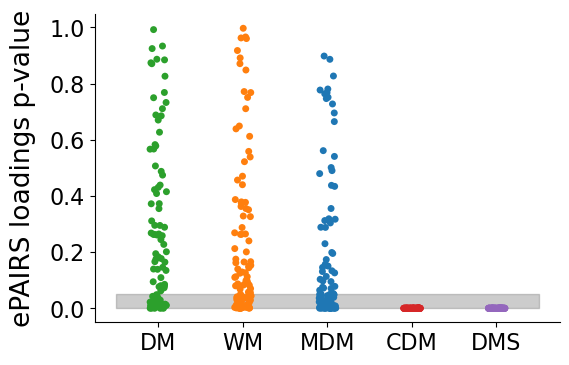

In [7]:
# Extended Fig 1b
sns.stripplot(data=[l['p'] for l in results_list], palette=palette)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('ePAIRS loadings p-value')
xlims = plt.gca().get_xlim()
plt.fill_between([xlims[0], xlims[1]], [0, 0], [0.05, 0.05], color='gray', alpha=.4)
# plt.savefig('si_sec1/load_pval.svg', bbox_inches='tight')

<ErrorbarContainer object of 3 artists>

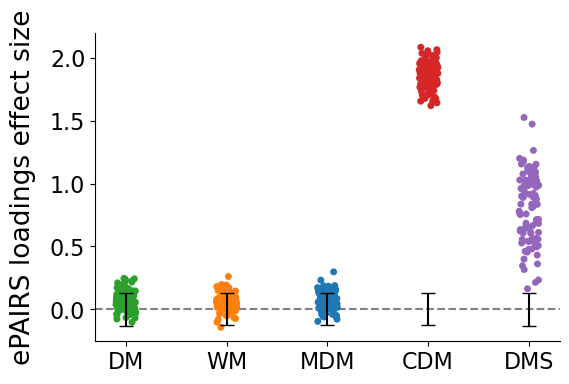

In [8]:
# Main Fig 1h
sns.stripplot(data=[l['c'] for l in results_list], palette=palette)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('ePAIRS loadings effect size')
plt.axhline(0, ls='--', c='gray')
plt.errorbar(0, 0, yerr=2*np.std(rdm_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(1, 0, yerr=2*np.std(romo_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(2, 0, yerr=2*np.std(raposo_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(3, 0, yerr=2*np.std(mante_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(4, 0, yerr=2*np.std(dms_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
# plt.savefig('figure_1/load_cval.svg', bbox_inches='tight')

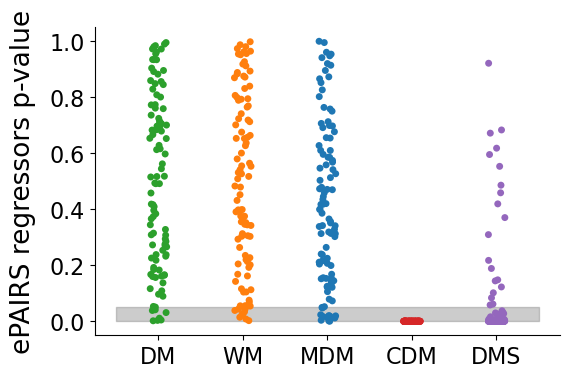

In [9]:
# Extended Fig 1d
sns.stripplot(data=np.stack([l['preg'] for l in results_list], axis=1), palette=palette)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('ePAIRS regressors p-value')
xlims = plt.gca().get_xlim()
plt.fill_between([xlims[0], xlims[1]], [0, 0], [0.05, 0.05], color='gray', alpha=.4)
# plt.savefig('si_sec1/reg_pval.svg', bbox_inches='tight')

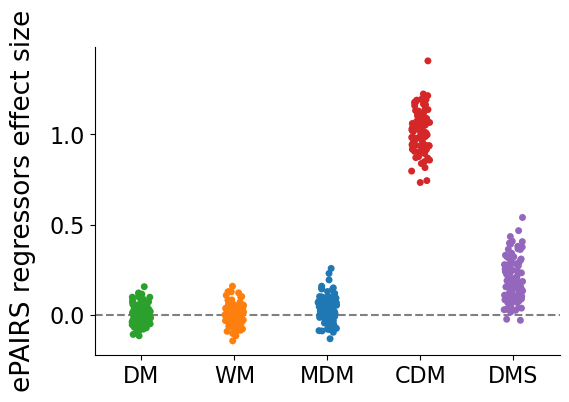

In [10]:
# Extended Fig 1c
sns.stripplot(data=np.stack([l['creg'] for l in results_list], axis=1), palette=palette)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('ePAIRS regressors effect size')
plt.axhline(0, ls='--', c='gray')
# plt.savefig('si_sec1/reg_cval.svg', bbox_inches='tight')

Text(0, 0.5, 'Resampled nets accuracy')

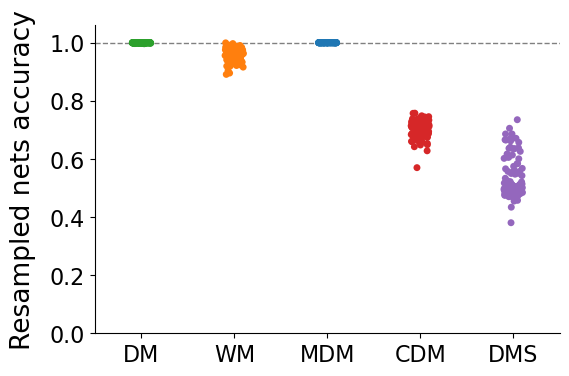

In [11]:
# Main Fig 1l
sns.stripplot(data=np.stack([l['acc_res'].mean(axis=1) for l in results_list], axis=1), palette=palette)
plt.axhline(1, c='gray', lw=1, ls='--')
plt.xticks(list(range(len(labels))), labels)
plt.ylim(0, 1.06)
plt.ylabel('Resampled nets accuracy')
# plt.savefig('figure_1/res.svg', bbox_inches='tight')

# Example networks (panels f-g-j-k)

## MDM task

In [12]:
helpers.setup_matplotlib()
color = sns.color_palette('deep')[0]

In [13]:
hidden_size = 512
noise_std = 0
alpha = 0.2

x_train, y_train, mask_train, x_val, y_val, mask_val = raposo.generate_data(1000)
net = LowRankRNN(4, hidden_size, 1, noise_std, alpha, rank=1)
net.load_state_dict(torch.load(f'../models/raposo_lr_fig1.pt', map_location='cpu'))
loss_orig, acc_orig = raposo.test(net, x_val, y_val, mask_val)
print(acc_orig)

0.9950000047683716


In [14]:
# Building connectivity space
m = net.m[:,0].detach().numpy()
n = net.n[:,0].detach().numpy()
wi1 = net.wi_full[0].detach().numpy()
wi2 = net.wi_full[1].detach().numpy()
wi3 = net.wi_full[2].detach().numpy()
wi4 = net.wi_full[3].detach().numpy()
wo = net.wo_full[:,0].detach().numpy()

(500, 512)
clusteriness: 0.004080990474831868
data mean: 0.456, mc mean: 0.456
KS 2 sample test: p=0.9754693461188239
Wilcoxon rank-sum test: p=0.8002365810986691
Kruskal-Wallis test: p=0.8002365812430914


(0.8002365810986691, 0.004080990474831868)

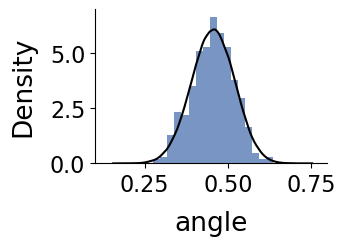

In [15]:
# Panel g

figsize = plt.rcParams['figure.figsize']
figsize = (figsize[0] / 2, figsize[1] / 2)
conn_space = np.array([wi1, wi2, wi3, wi4, n, m]).transpose()
ms.epairs(conn_space, 500, figsize=figsize, xlim=(.1, .8), col=color)
# plt.savefig('figure_1/epairs_raposo.pdf', bbox_inches='tight')

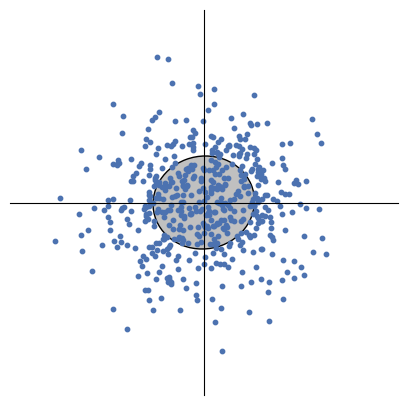

In [16]:
# Panel f

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(wi3, wi4, color=color, s=10)
helpers.center_axes(ax)
xlim = 1.3 * max(-np.min(wi3), np.max(wi3))
ylim = 1.3 * max(-np.min(wi4), np.max(wi4))
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)

X = np.array([wi3, wi4]).T
cov = X.T @ X / X.shape[0]
eigvals, eigvecs = np.linalg.eig(cov)
v1 = eigvecs[:, 0]
angle = np.arctan(v1[1] / v1[0])
angle = angle * 180 / np.pi
std_factor = 1
ax.add_artist(Ellipse(xy=[0, 0], 
                      angle=angle,
                      width=np.sqrt(eigvals[0]) * 2 * std_factor, 
                      height=np.sqrt(eigvals[1]) * 2 * std_factor, 
                      fill=True, fc='silver', ec='black', lw=1, zorder=-1))

# plt.savefig('figure_1/raposo_loadings_scatter.svg', bbox_inches='tight')

In [17]:
# Gaussian Resampling

net2 = clustering.to_support_net(net, np.zeros(hidden_size))
net2.resample_basis()
loss, acc = raposo.test(net2, x_val, y_val, mask_val)
print(loss, acc)

0.14576907455921173 0.9900000095367432


In [18]:
m_res = net2.m.detach().numpy().squeeze()
n_res = net2.n.detach().numpy().squeeze()
wi_ctx1_res = net2.wi[2].detach().numpy().squeeze()
wi_ctx2_res = net2.wi[3].detach().numpy().squeeze()
wi1_res = net2.wi[0].detach().numpy().squeeze()
wi2_res = net2.wi[1].detach().numpy().squeeze()

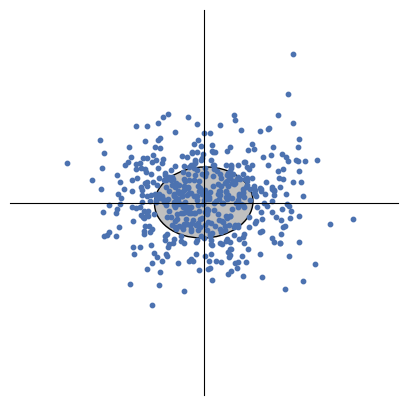

In [19]:
# Panel j

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(wi_ctx1_res, wi_ctx2_res, s=10, color=color)
helpers.center_axes(ax)
xlim = 1.3 * max(-np.min(wi_ctx1_res), np.max(wi_ctx1_res))
ylim = 1.3 * max(-np.min(wi_ctx2_res), np.max(wi_ctx2_res))
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)

X = np.array([wi3, wi4]).T
cov = X.T @ X / X.shape[0]
eigvals, eigvecs = np.linalg.eig(cov)
v1 = eigvecs[:, 0]
angle = np.arctan(v1[1] / v1[0])
angle = angle * 180 / np.pi
std_factor = 1
ax.add_artist(Ellipse(xy=[0, 0], 
                      angle=angle,
                      width=np.sqrt(eigvals[0]) * 2 * std_factor, 
                      height=np.sqrt(eigvals[1]) * 2 * std_factor, 
                      fill=True, fc='silver', ec='black', lw=1, zorder=-1))

# plt.savefig('figure_1/rapoos_res_scatter.svg', bbox_inches='tight')

(500, 512)
clusteriness: -0.18104196832012207
data mean: 0.468, mc mean: 0.456
KS 2 sample test: p=0.007777772078479572
Wilcoxon rank-sum test: p=0.04482842495352086
Kruskal-Wallis test: p=0.044828424956084384


(0.04482842495352086, -0.18104196832012207)

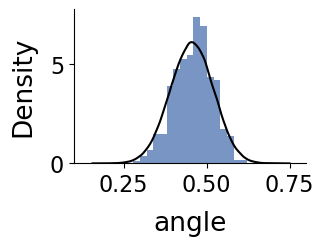

In [20]:
# Panel k

figsize = plt.rcParams['figure.figsize']
figsize = (figsize[0] / 2, figsize[1] / 2)
conn_space = np.array([wi1_res, wi2_res, wi_ctx1_res, wi_ctx2_res, m_res, n_res]).T
ms.epairs(conn_space, 500, figsize=figsize, xlim=(.1, .8), col=color)
# plt.savefig('figure_1/epairs_raposo_res.pdf', bbox_inches='tight')

## CDM networks

In [21]:
helpers.setup_matplotlib()
color = sns.color_palette('deep')[3]

In [22]:
hidden_size = 512
noise_std = 0
alpha = 0.2

x_train, y_train, mask_train, x_val, y_val, mask_val = mante.generate_mante_data(1000, fraction_validation_trials=.2)
net = LowRankRNN(4, hidden_size, 1, noise_std, alpha, rank=1)
net.load_state_dict(torch.load(f'../models/mante_lr_fig1.pt', map_location='cpu'))
loss_orig, acc_orig = mante.test_mante(net, x_val, y_val, mask_val)
print(acc_orig)

1.0


In [23]:
m = net.m[:,0].detach().numpy()
n = net.n[:,0].detach().numpy()
wi1 = net.wi[0].detach().numpy()
wi2 = net.wi[1].detach().numpy()
wi_ctx1 = net.wi[2].detach().numpy()
wi_ctx2 = net.wi[3].detach().numpy()
wo = net.wo[:,0].detach().numpy()

# Positivity adjustments
n = -n
m = -m

(500, 512)
clusteriness: 1.8702863469224242
data mean: 0.334, mc mean: 0.456
KS 2 sample test: p=7.714159862410631e-151
Wilcoxon rank-sum test: p=1.9882176176624133e-141
Kruskal-Wallis test: p=1.9882176176474794e-141


(1.9882176176624133e-141, 1.8702863469224242)

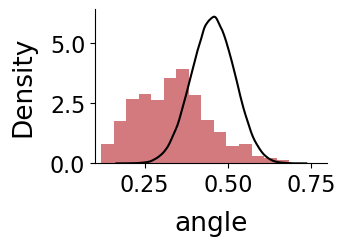

In [24]:
# Panel g

figsize = plt.rcParams['figure.figsize']
figsize = (figsize[0] / 2, figsize[1] / 2)
conn_space = np.stack([m, n, wi1, wi2, wi_ctx1, wi_ctx2]).T
ms.epairs(conn_space, 500, figsize=figsize, xlim=(.1, .8), col=color)
# plt.savefig('figure_1/epairs_mante.pdf', bbox_inches='tight')

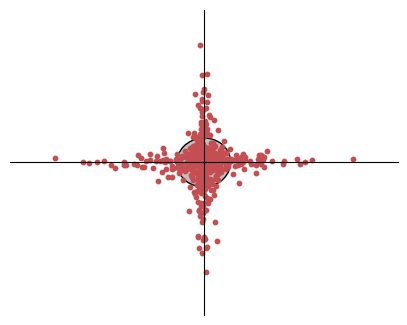

In [25]:
# Panel f

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(wi_ctx1, wi_ctx2, color=color, s=10)
ax.set_aspect(1)
helpers.center_axes(ax)

xlim = 1.3 * max(-np.min(wi_ctx1), np.max(wi_ctx1))
ylim = 1.3 * np.max(wi_ctx2)
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)

X = np.array([wi_ctx1, wi_ctx2]).T
cov = X.T @ X / X.shape[0]
eigvals, eigvecs = np.linalg.eig(cov)
v1 = eigvecs[:, 0]
angle = np.arctan(v1[1] / v1[0])
angle = angle * 180 / np.pi
std_factor = 1
ax.add_artist(Ellipse(xy=[0, 0], 
                      angle=angle,
                      width=np.sqrt(eigvals[0]) * 2 * std_factor, 
                      height=np.sqrt(eigvals[1]) * 2 * std_factor, 
                      fill=True, fc='silver', ec='black', lw=1, zorder=-1))


# plt.savefig('figure_1/mante_loadings_scatter.svg', bbox_inches='tight')

In [26]:
# Gaussian resampling
net2 = clustering.to_support_net(net, np.zeros(hidden_size))
net2.resample_basis()
loss, acc = mante.test_mante(net2, x_val, y_val, mask_val)
print(loss, acc)

0.7770155072212219 0.7149999737739563


In [27]:
m_res = net2.m.detach().numpy().squeeze()
n_res = net2.n.detach().numpy().squeeze()
wi_ctx1_res = net2.wi[2].detach().numpy().squeeze()
wi_ctx2_res = net2.wi[3].detach().numpy().squeeze()
wi1_res = net2.wi[0].detach().numpy().squeeze()
wi2_res = net2.wi[1].detach().numpy().squeeze()

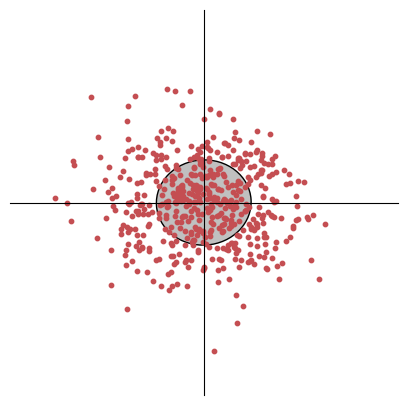

In [28]:
# Panel j

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(wi_ctx1_res, wi_ctx2_res, s=10, color=color)
helpers.center_axes(ax)
xlim = 1.3 * max(-np.min(wi_ctx1_res), np.max(wi_ctx1_res))
ylim = 1.3 * max(-np.min(wi_ctx2_res), np.max(wi_ctx2_res))
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)

X = np.array([wi_ctx1, wi_ctx2]).T
cov = X.T @ X / X.shape[0]
eigvals, eigvecs = np.linalg.eig(cov)
v1 = eigvecs[:, 0]
angle = np.arctan(v1[1] / v1[0])
angle = angle * 180 / np.pi
std_factor = 1
ax.add_artist(Ellipse(xy=[0, 0], 
                      angle=angle,
                      width=np.sqrt(eigvals[0]) * 2 * std_factor, 
                      height=np.sqrt(eigvals[1]) * 2 * std_factor, 
                      fill=True, fc='silver', ec='black', lw=1, zorder=-1))

# plt.savefig('figure_1/mante_res_scatter.svg', bbox_inches='tight')

(500, 512)
clusteriness: 0.03659479143283585
data mean: 0.454, mc mean: 0.456
KS 2 sample test: p=0.3141905059479988
Wilcoxon rank-sum test: p=0.2055764572896751
Kruskal-Wallis test: p=0.20557645730289245


(0.2055764572896751, 0.03659479143283585)

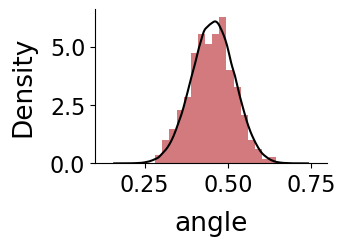

In [29]:
# Panel k

figsize = plt.rcParams['figure.figsize']
figsize = (figsize[0] / 2, figsize[1] / 2)
conn_space = np.array([wi1_res, wi2_res, wi_ctx1_res, wi_ctx2_res, m_res, n_res]).T
ms.epairs(conn_space, 500, figsize=figsize, xlim=(.1, .8), col=color)
# plt.savefig('figure_1/epairs_mante_res.pdf', bbox_inches='tight')